# Lab: Introduction to Machine Learning

## 0. Learning Objectives : 🎯
After completing this notebook, learners will be able to:

✅ Understand the fundamentals of Machine Learning (ML)

✅ Describe classification, regression, synthesis, and clustering tasks in Machine Learning.

✅ Differentiate between supervised, unsupervised, and reinforcement learning.

✅ Understand the differences between Machine Learning and Deep Learning:


## 1. Overview of Machine Learning

**Machine Learning (ML)** is a subset of artificial intelligence (AI) that enables systems to learn from data and improve their performance without being explicitly programmed. ML is widely used in various fields, including healthcare, finance, and marketing.

### Applications in Healthcare:
- **Diagnosis**: Predicting diseases based on patient data.
- **Treatment Recommendations**: Personalizing treatment plans.
- **Drug Discovery**: Accelerating the development of new drugs.
- **Medical Imaging**: Analyzing X-rays, MRIs, and CT scans.

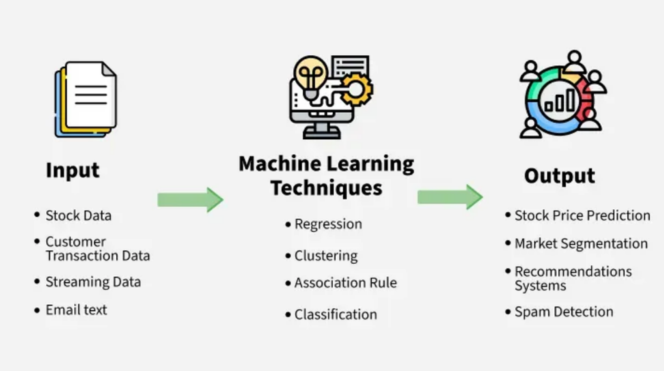

## 2. Machine Learning Tasks

ML tasks can be broadly categorized into the following:

### a. Classification
- **Goal**: Predict a discrete label (e.g., spam or not spam).
- **Example**: Classifying whether a patient has diabetes based on medical records.

### b. Regression
- **Goal**: Predict a continuous value (e.g., house prices).
- **Example**: Predicting the length of hospital stay for a patient.

### c. Clustering
- **Goal**: Group similar data points together.
- **Example**: Grouping patients with similar symptoms for targeted treatment.

### d. Synthesis
- **Goal**: Generate new data similar to the training data.
- **Example**: Generating synthetic medical data for research.


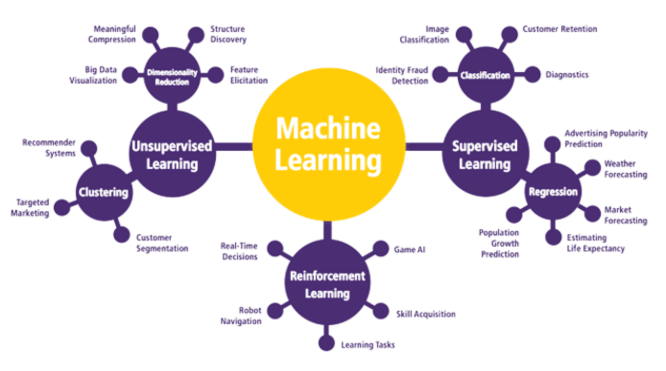

## 3. Types of Machine Learning

### a. Supervised Learning
The model learns from labeled data (input-output pairs).
- **Examples**: Classification, regression.

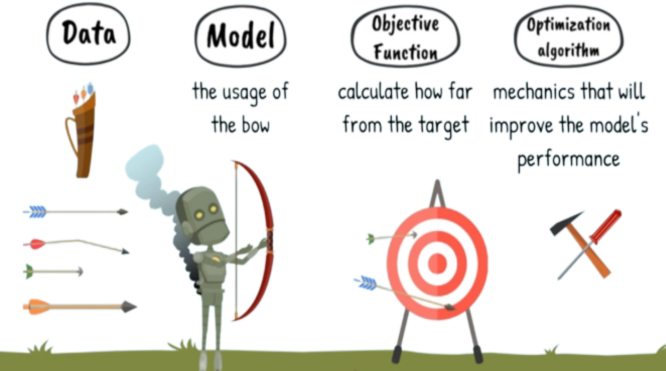

### What is Linear Regression?

**`Linear Regression`** is a method to predict dependent varaible (Y) based on values of independent varaibles (X) by modelling the relationship between them as a **straight line**.

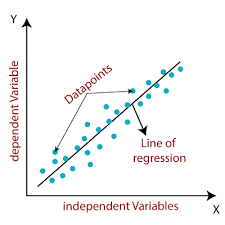

The diagram above demonstrates a **`1-dimensional linear regression model`**: by fitting a straight line through the data points, we can **make predictions of Y at any values of X**.

### When to use Linear Regression?

Linear Regression can be used when the **target variable is numerical and continuous**.

For example, we can use linear regression to **predict the price of a house** (Y) based on its attributes (X) like size, location, style and etc.

Linear Regression considers all the **`inputs`** as **numerical varaibles**. Therefore, we need to encode all the categorical variables to make them numerical before training the model.

<a id="2"></a>

# <center>How does Linear Regression learn from data?</center>

### The Best-fit Line

We know that Linear Regression fits a straight line through the data points, but **how does it find the `best line`** that will give the most accurate predictions?

Linear Regression assumes the output (Y) and inputs (X) follows a linear relationship, however, it is **unlikely that real-world data will fall perfectly onto a single straight line**. Therefore, **`errors`** exist when we use a straight line to model the relationship between Y and X.

To find the **`best-fit line`**, we aim to **minimise the errors**. There are a few ways to **measure the errors**:

### Least Square Estimation

The most commonly used approach for estimating the best-fit line is called the **`Least Square Estimation`**, which is to find the **model parameters** that minimise the **Mean Square Error (MSE)**.


###What are the assumptions that Linear Regression made?

#### Linearity
Obviously, Linear Regression assumes that there exists a **linear relationship** between Y and X.
This assumption can be verify by plotting a **scatter plot**.
#### Normality
This assumption states that the **residuals** (differences between the actual Y values and the predicted Y values) of a Linear Regression model are **normally distributed**.
#### Homoscedasticity
**Homoscedasticity** means that the variation of the dependent varaible (Y) remains constant across the independent varaible (X) values.
We can check homoscedasticity by plotting a scatter plot with the **model prediction on the x-axis** and the **residuals on the y-axis**. We are expecting to see a **horizontal straight line** on the plot to prove homoscedasticity.
#### Little/No Multicollinearity
When there are **multiple input varaibles**, we have to make sure that **multicollinearity does not exist** or at least there is little multicollinearity.

**Multicollinearity** describes the correlation between the input varaibles. No multicollinearity means that the input varaibles are **independent** to each other.

We can check this assumption by creating **pair plots** and we expect to see **no relationships** between input varaibles.

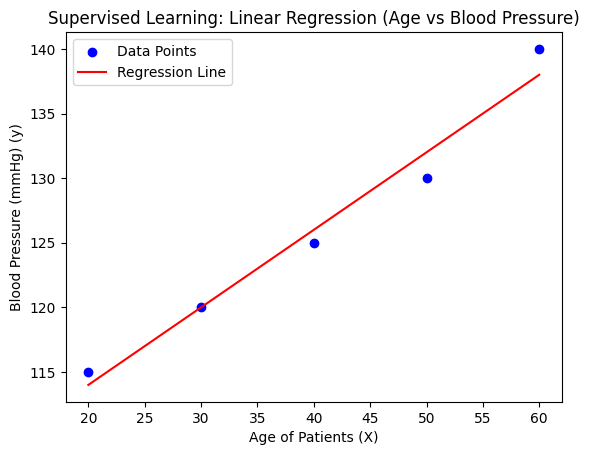

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example Data: Age vs Blood Pressure (as an example scenario)
X = np.array([20, 30, 40, 50, 60]).reshape(-1, 1)  # Feature: Age of patients
y = np.array([115, 120, 125, 130, 140])  # Target: Blood pressure

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Predict Blood Pressure based on Age
y_pred = model.predict(X)

# Plot the Results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Supervised Learning: Linear Regression (Age vs Blood Pressure)")
plt.xlabel("Age of Patients (X)")
plt.ylabel("Blood Pressure (mmHg) (y)")
plt.legend()
plt.show()

### b. Unsupervised Learning
Where the model learns from unlabeled data (no output labels).
- **Examples**: Clustering, dimensionality reduction...


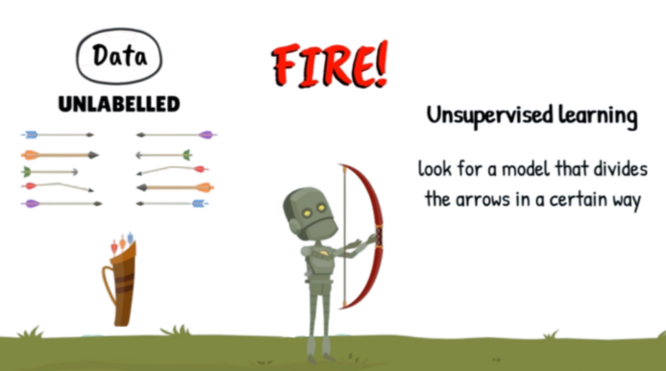

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


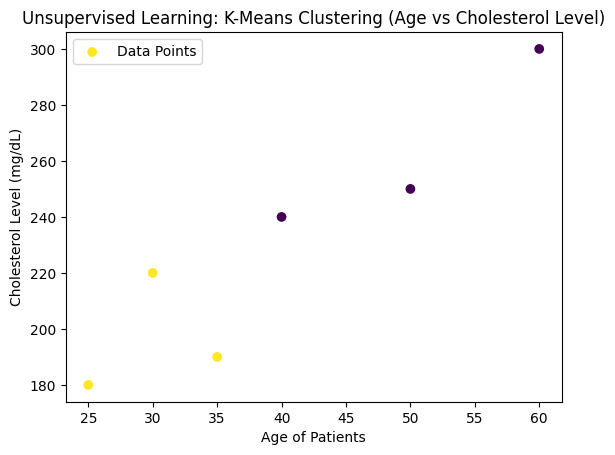

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Example Data: Age vs Cholesterol Level (as an example scenario)
# Features: Age of patients and their cholesterol level
X = np.array([[25, 180], [30, 220], [35, 190], [40, 240], [50, 250], [60, 300]])

# Train a K-Means Model to group patients into two clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Predict Clusters (which group each patient belongs to)
labels = kmeans.predict(X)

# Plot the Results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.title("Unsupervised Learning: K-Means Clustering (Age vs Cholesterol Level)")
plt.xlabel("Age of Patients")
plt.ylabel("Cholesterol Level (mg/dL)")
plt.legend()
plt.show()

## What is clustering?

**`Clustering`** is an **unsupervised** technique used when the data doesn't have a **natrual output variable** for us to predict.

Instead of **finding the relationships** between the input and output variables (like **supervised learning** does), clustering **splits** the data into different **clusters** where the data in each cluster is **as similar as possible**. For example, **clustering customers** based on location:

## How to find the clusters?

**Clustering** is all about measuring **distances** between data points. **Closer** the distances between data points, **higher the similarity** between them.

With the distances calculated, we can find the data points that are **close to each other** and group them into a cluster. In the end, we want to form clusters that are as **far away from each other** as possible. How do we evaluate this?

## Distances between clusters

There are **5 different methods** in calculating **distances between clusters**:

1. **`Minimum Distance`**: the **minimum** distance between the two points from each cluster
2. **`Maximum Distance`**: the **maximum** distance between the two points from each cluster
3. **`Average Distance`**: the **average** distance of all the combinations of two points from each cluster
4. **`Centroid Distance`**: the distance between the **centroids** of the two clusters
5. **`Ward's Method`**: talk about this later...

Hard to imagine? Let me show you some **visualizations**:

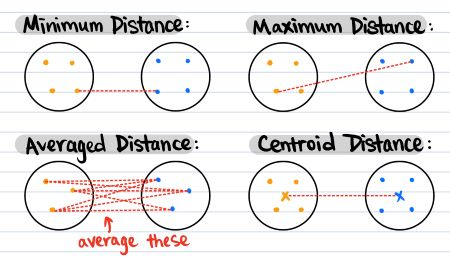

## K-Means Clustering

**`K-Means Clustering`** clusters data points by **iteratively assigning** them to the **closest cluster** (centroid) which **changes over time** based on the data points assigned to it. (**k** indicates the **number of clusters**)

The algorithm first **randomly assigns** the data points to **3 clusters**. Following, it finds the **centroids** of these 3 clusters. Then, it **reassigns** the data points to the **closest cluster (centroid)**. The algorithm **repeats** this step until there is **no more change** made. With such a method, **k-means clustering** is **less intuitive** but **doesn't suffer from myopic decisions** and often achieve **better results**.

There is big difference between the 2 algorithms: **hierarchical clustering** choose the **number of clusters** after the data points are grouped while **k-means clustering** requires a **preset value of k**. But how do we know what is the **optimal number of clusters**?

1. Domain knowledge
2. Practical constraints
3. The **Elbow Chart**: choose the **turning point** that balance the trade-off between the **number of clusters** and **clusters' compactness**

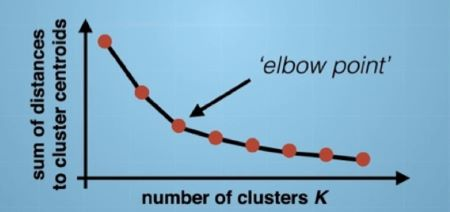

## K-Means++ Clustering

**`K-Means++ Clustering`** is the **improved version** of the k-means clustering algorithm.

In the initial stage of the **k-means clustering** algorithm, it assigns the data points **randomly** to a cluster. That is, it initializes the positions of the **cluster centroids** randomly. This **randomness** can lead in **suboptimal results**.

This is avoid with the an **improved initialization method**:

1. The centroid of the first cluster is placed **randomly**.
2. The centroid of the next cluster is placed with a **probability proportional to the distance** of each point to its nearest cluster centroid.
3. This makes it likely for the next centroid to be placed **as far away from the already initialized centroids as possible**.

#### Example: Customer Churn Analysis

Dataset comes from: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, normalize

### Import Data

In [4]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
y = df['Churn']

### Data Preprocess

In [5]:
#convert the column values of TotalCharges to numerical
df.TotalCharges = df['TotalCharges'].replace(' ', '0', regex=True)
df.TotalCharges = pd.to_numeric(df.TotalCharges)

#drop columns
df = df.drop(['customerID','Churn'], axis=1).copy()

#numerical and categorical variables
numerical_index = (df.dtypes != 'object')
numerical_features = list(numerical_index[numerical_index].index)
categorical_index = (df.dtypes == 'object')
categorical_features = list(categorical_index[categorical_index].index)

#standardize numerical variables
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#encode categorical variables
encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])

### K-Means++ Clustering

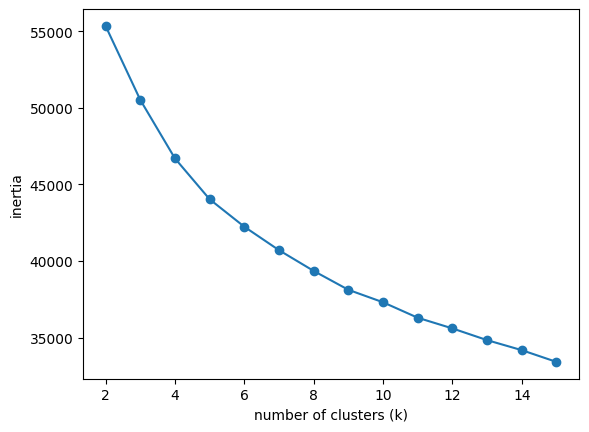

In [6]:
num_clusters = np.arange(2,16)
inertias = []

for k in num_clusters:
    model = KMeans(init='k-means++', n_clusters=k, random_state=0)
    model.fit(df)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

From the above **elbow chart**, we can choose the **optimal k vlaue** as 4.

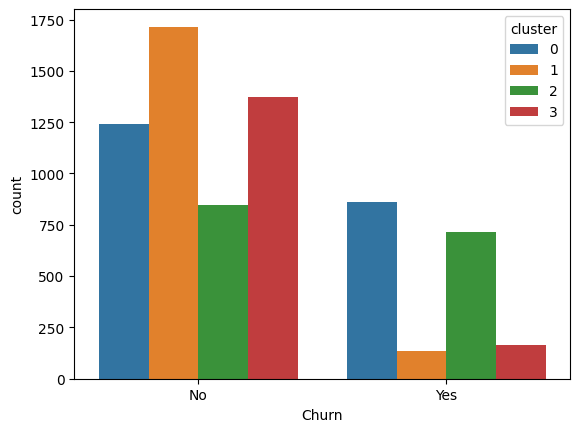

In [7]:
model = KMeans(init='k-means++', n_clusters=4, random_state=0)
model.fit(df)

df['cluster'] = model.predict(df)
df['Churn'] = y
sns.countplot(x='Churn', hue="cluster", data=df)
plt.show()

As we can see, the **k-means++ clustering** algorithm has clustered the customers into **4 different groups** with 2 groups having **high churn rates** and 2 groups having **low churn rates**.

## Hierarchical Clustering</center>

In [8]:
# Import Data
data = pd.read_csv('/kaggle/input/wholesale-customers-data/Wholesale customers data.csv')

In [9]:
# Data Preprocess
#normalize the data
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


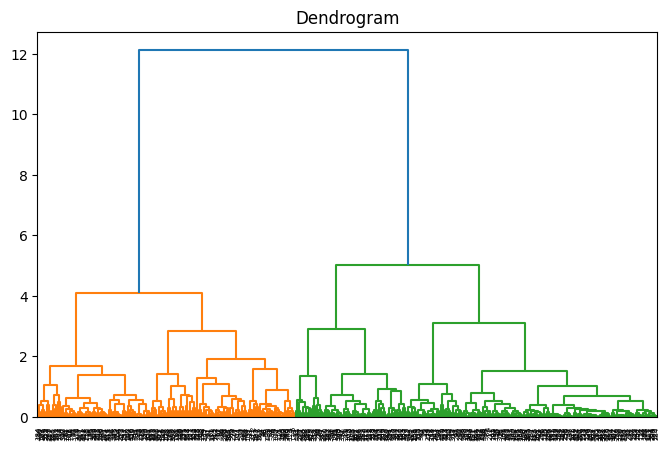

In [10]:
# Dendrogram
plt.figure(figsize=(8,5))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The **vertical line** with **maximum distance** is the **blue line** and hence we can decide on a **threshold of 6** and **cut the dendrogram**.

**Larger** the vertical line, **better** the clustering results. (clusters are far away from each other)

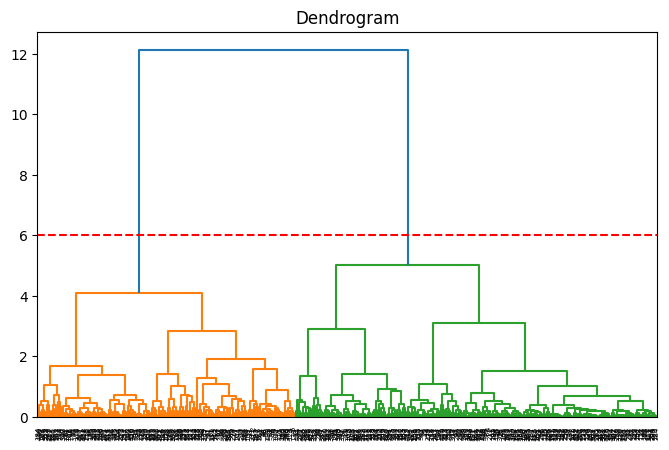

In [11]:
plt.figure(figsize=(8,5))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

### Hierarchical Clustering

By cutting the dandrogram, we know the **optimal number of clusters** is 2 and here we use the **euclidean distances** between data points and the **ward's method** for distances between clusters.

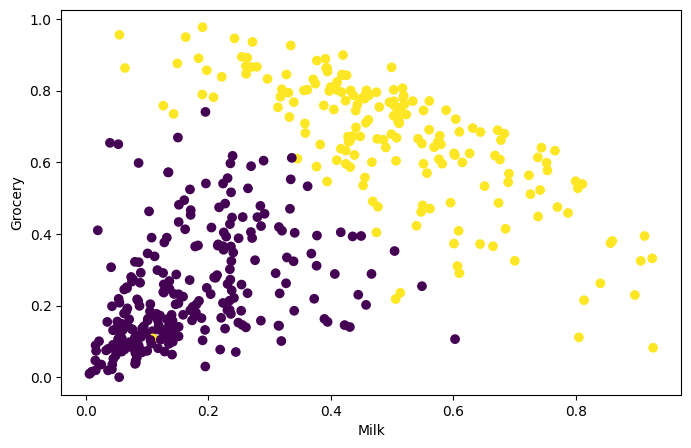

In [12]:
cluster = AgglomerativeClustering(n_clusters = 2,
                                  affinity = 'euclidean',
                                  linkage = 'ward')
cluster.fit(data_scaled)

plt.figure(figsize=(8,5))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()

### c. Reinforcement Learning
- **Definition**: The model learns by interacting with an environment and receiving rewards or penalties.
- **Examples**: Game playing (e.g., AlphaGo), robotics.
- **Code Example**: Simulating a simple reinforcement learning task (e.g., a robot navigating a grid).

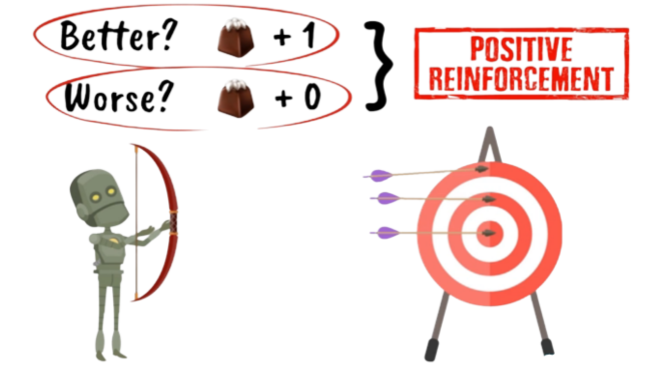

In [13]:
# Reinforcement Learning Example: Simple Grid World
import numpy as np

# Define Environment
grid = np.zeros((3, 3))  # 3x3 grid
rewards = {(0, 2): 1, (1, 2): -1}  # Rewards for specific states

# Define Agent Actions
actions = ['up', 'down', 'left', 'right']

# Simulate Agent Movement
def move(state, action):
    if action == 'up' and state[0] > 0:
        return (state[0] - 1, state[1])
    elif action == 'down' and state[0] < 2:
        return (state[0] + 1, state[1])
    elif action == 'left' and state[1] > 0:
        return (state[0], state[1] - 1)
    elif action == 'right' and state[1] < 2:
        return (state[0], state[1] + 1)
    return state

# Example Simulation
state = (1, 1)  # Start at the center
action = 'right'  # Move right
new_state = move(state, action)
print(f"Agent moved from {state} to {new_state}")

Agent moved from (1, 1) to (1, 2)


## 4. Machine Learning vs Deep Learning

### Machine Learning:
- Focuses on algorithms that learn from data.
- Works well with structured data (e.g., tables).
- Examples: Linear regression, decision trees, SVM.

### Deep Learning:
- A subset of ML that uses neural networks with many layers.
- Excels with unstructured data (e.g., images, text, audio).
- Examples: Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs).

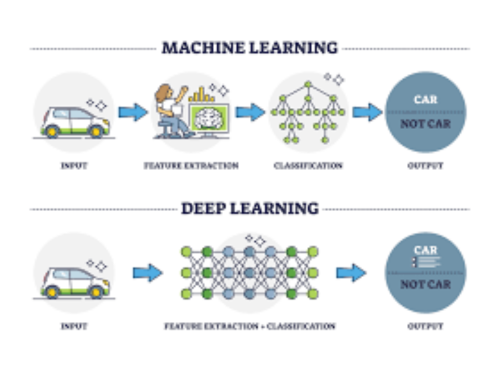

## Summary

In this lab, we covered:
- The **overview of machine learning** and its applications.
- Common **machine learning tasks** like classification, regression, and clustering.
- The **types of machine learning**: supervised, unsupervised, and reinforcement learning.
- The **difference between machine learning and deep learning**.

You can now experiment with the provided code examples and explore further!